## Teoman Kaman, 11 October 2025

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Part-1 Data Loading and Cleaning 

### Load the Data

In [2]:
# Load datasets
games_df = pd.read_csv('data/video_games.csv')
ratings_df = pd.read_csv('data/game_ratings.csv')

print("Games DataFrame shape:", games_df.shape)
print("Ratings DataFrame shape:", ratings_df.shape)
print("games first five element: \n", games_df.head())
print("rating first five element: \n ", ratings_df.head())

Games DataFrame shape: (810, 10)
Ratings DataFrame shape: (494, 5)
games first five element: 
            Name Platform    Year      Genre             Publisher  NA_Sales  \
0  Championship       DS  2017.0     Action                Capcom      0.04   
1         Quest     XOne  2013.0  Adventure             Microsoft      0.18   
2      Warriors       DS  2015.0     Racing            Activision      1.08   
3    Dark Quest      PS4  1985.0   Fighting             505 Games      0.14   
4     Adventure       PC  2005.0  Adventure  Take-Two Interactive      0.02   

   EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0      0.03      0.01          0.0          0.08  
1      0.10      0.03         -0.0          0.31  
2      0.73      0.49         -0.0          2.30  
3      0.09      0.02          0.0          0.25  
4      0.02      0.00         -0.0          0.05  
rating first five element: 
              Name Platform  Critic_Score User_Score Rating
0  Extreme Quest      PS3          6

### Initial Data Exploration

In [3]:
games_df.info()
ratings_df.info()
print( "---" * 30)
print("save initial rows for both datasets")
initial_rows_games = len(games_df)
initial_rows_ratings = len(ratings_df)



print( "---" * 30)
print("Missing values in games dataset \n", games_df.isnull().sum())
print( "---" * 30)
print("Missing values in ratings dataset \n", ratings_df.isnull().sum())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          810 non-null    object 
 1   Platform      810 non-null    object 
 2   Year          770 non-null    float64
 3   Genre         810 non-null    object 
 4   Publisher     786 non-null    object 
 5   NA_Sales      810 non-null    float64
 6   EU_Sales      810 non-null    float64
 7   JP_Sales      810 non-null    float64
 8   Other_Sales   810 non-null    float64
 9   Global_Sales  810 non-null    float64
dtypes: float64(6), object(4)
memory usage: 63.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          494 non-null    object 
 1   Platform      494 non-null    object 
 2   Critic_Score  455 non-null    float64
 3   Us

### Use Describe for the Main Games Dataset and Check Duplicates for Each Dataset

In [4]:
print(games_df.describe())### use describe for the main games dataset

print("---" * 30)
print("Check duplicates in Both Datasets")
# check for duplicates
print("Number of duplicate rows in games_df:", games_df.duplicated().sum())
print("Number of duplicate rows in ratings_df:", ratings_df.duplicated().sum())

              Year    NA_Sales    EU_Sales    JP_Sales  Other_Sales  \
count   770.000000  810.000000  810.000000  810.000000        810.0   
mean   2009.725974    0.870926    0.600457    0.175037          0.0   
std       8.511232    2.907225    1.943002    0.733376          0.0   
min    1985.000000    0.000000    0.000000    0.000000         -0.0   
25%    2005.000000    0.070000    0.050000    0.010000          0.0   
50%    2012.000000    0.190000    0.130000    0.030000          0.0   
75%    2016.000000    0.597500    0.440000    0.100000          0.0   
max    2020.000000   45.860000   29.090000   12.500000          0.0   

       Global_Sales  
count    810.000000  
mean       1.648524  
std        5.528638  
min        0.000000  
25%        0.130000  
50%        0.360000  
75%        1.147500  
max       85.880000  
------------------------------------------------------------------------------------------
Check duplicates in Both Datasets
Number of duplicate rows in games_df:

### Questions to Answer
- How many missing values are in the Year column?

There are 40 missing values in the Year column. 

- Which columns have missing values in the ratings dataset?

Critic_Score with 39 missing values and Ratings with 24 missing values.

- Are there any duplicate rows?

Yes in games there are 10 in ratings there are 8 duplicate rows

### Data Cleaning

In [5]:
#NOTE: This is for game dataset
# remove the null data
games_df = games_df.dropna()

# convert year to integer type
games_df['Year'] = games_df['Year'].astype(int)

# remove rows where publisher is missing
games_df = games_df[games_df['Publisher'] != 'N/A']

# remove any duplicates
games_df = games_df.drop_duplicates()

# Verify that Global_Sales equals the sum of regional sales (fix if not)
games_df['Global_Sales'] = games_df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)

In [6]:
#NOTE: This is for ratings dataset

#Handle the User_Score column (it contains 'tbd' strings): Replace 'tbd' with NaN Convert to numeric type
ratings_df['User_Score'] = pd.to_numeric(ratings_df['User_Score'], errors='coerce')

# remove the rows where both Critic_Score and User_Score are missing
ratings_df = ratings_df.dropna(subset=['Critic_Score', 'User_Score'], how='all')

# remoce duplicates
ratings_df = ratings_df.drop_duplicates()

In [7]:
# How many rows were removed from each dataset? What are the new shapes of the datasets?

#shapes for both datasets
print("New shape of games_df:", games_df.shape)
print("New shape of ratings_df:", ratings_df.shape)

# how many rows were removed from each dataset
final_rows_games = len(games_df)
final_rows_ratings = len(ratings_df)

removed_rows_games = initial_rows_games - final_rows_games
print(f"Total rows removed from games: {removed_rows_games}")

removed_rows_ratings = initial_rows_ratings - final_rows_ratings
print(f"Total rows removedf from ratings: {removed_rows_ratings}")



New shape of games_df: (738, 10)
New shape of ratings_df: (485, 5)
Total rows removed from games: 72
Total rows removedf from ratings: 9


### Questions to Answer

- How many rows were removed from each dataset?

From games 72 rows removed
From ratings 9 rows removed

- What are the new shapes of the datasets?

The shape of games is now 738 rows adn 10 columns
The shape of ratings is now 485 rows and 5 columns


## Part-2 Exploratory Data Analysis

### Top Games Analysis

Top-10 best-selling games globally: 

                Name Platform  Year  Global_Sales
697        Adventure      PS4  2014         83.24
207        Adventure      PS4  2015         46.32
312           Sports      3DS  2015         41.81
318       Dark Quest       DS  2014         35.29
431           Strike      PS3  2014         25.26
718        Simulator     XOne  2014         22.84
339  Super Simulator      PS4  2008         21.64
773            Force      PS2  2016         21.38
69          Warriors     X360  2014         17.92
657    Shadow Racing       DS  2015         17.19
------------------------------------------------------------------------------------------
Top-5 publishers by total global sales: 

Publisher
Electronic Arts         167.29
Ubisoft                 159.15
Sony                    144.06
Nintendo                112.08
Take-Two Interactive     78.22
Name: Global_Sales, dtype: float64
-------------------------------------------------------------------------------

/var/folders/3b/cm4b_6dj6jx1x67c1tfdzj0c0000gp/T/ipykernel_25147/4010375648.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_publishers_sales, x='Publisher', y='Global_Sales', palette='viridis')


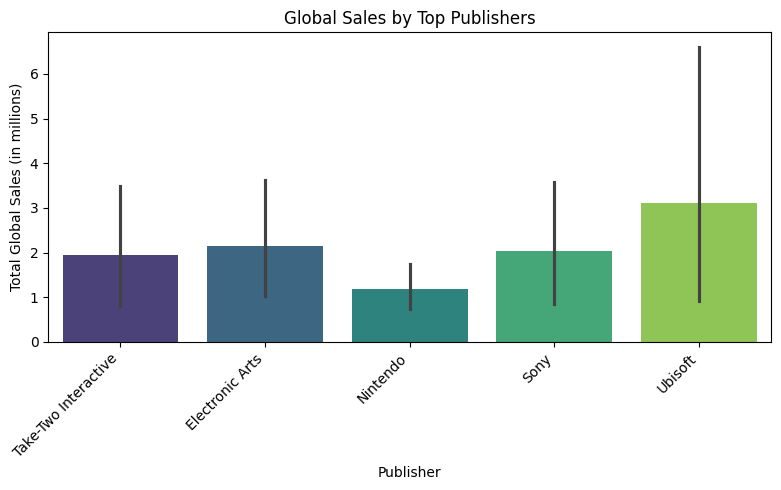

------------------------------------------------------------------------------------------

 Best-selling game of all time (aggregated across all years/platforms):
Adventure — 169.42 million units globally

 Publisher with the highest total global sales: Electronic Arts (167.29 million units)


In [8]:
# Find the top 10 best-selling games globally (show Name, Platform, Year, Global_Sales)

print("Top-10 best-selling games globally: \n")
print(games_df.nlargest(10, 'Global_Sales')[['Name', 'Platform', 'Year', 'Global_Sales']])

print( "---" * 30)
# Find the top 5 publishers by total global sales
print("Top-5 publishers by total global sales: \n")
top_publishers = games_df.groupby('Publisher')['Global_Sales'].sum().nlargest(5)
print(top_publishers)

print( "---" * 30)
# Display the sales for each top publisher
print("Display the sales for each publisher: \n")
top_publishers_sales = games_df[games_df['Publisher'].isin(top_publishers.index)]
print(top_publishers_sales[['Publisher', 'Global_Sales', 'Name', 'Year']])


plt.figure(figsize=(8,5))
sns.barplot(data=top_publishers_sales, x='Publisher', y='Global_Sales', palette='viridis')
plt.title('Global Sales by Top Publishers')
plt.xlabel('Publisher')
plt.ylabel('Total Global Sales (in millions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print( "---" * 30)
# to answer teh questions

game_sales = (
    games_df.groupby('Name', as_index=False)['Global_Sales']
    .sum()
    .sort_values('Global_Sales', ascending=False)
)

# Find the best-selling game of all time
best_game = game_sales.iloc[0]
print("\n Best-selling game of all time (aggregated across all years/platforms):")
print(f"{best_game['Name']} — {best_game['Global_Sales']:.2f} million units globally")


# 2 Which publisher has the highest total sales?
top_publisher = (
    games_df.groupby('Publisher', as_index=False)['Global_Sales']
    .sum()
    .sort_values('Global_Sales', ascending=False)
    .iloc[0]
)
print(f"\n Publisher with the highest total global sales: {top_publisher['Publisher']} "
      f"({top_publisher['Global_Sales']:.2f} million units)")


### Questions to answer:
- What is the best-selling game of all time?

Best selling game of all time is Adventure summed up by all years

- Which publisher has the highest total sales?

Publisher with the highest total global sales: Electronic Arts (167.29 million units)

### Platform Analysis

/var/folders/3b/cm4b_6dj6jx1x67c1tfdzj0c0000gp/T/ipykernel_25147/1458284054.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_platforms, x='Platform', y='Global_Sales', palette='magma')



 Top 10 platforms by number of games released:
Platform
PS3       87
PS4       82
PS2       75
Wii       73
X360      69
DS        61
PC        58
XOne      55
Xbox      45
Switch    43
Name: count, dtype: int64

 Total global sales by platform:
   Platform  Global_Sales
9       PS4        252.07
1        DS        172.96
7       PS2        125.10
13      Wii        121.65
8       PS3        121.44
15     X360        112.57
0       3DS         73.83
16     XOne         47.83
5        PC         29.48
12   Switch         27.14
14     WiiU         22.87
10      PSP         17.61
17     Xbox         16.46
6        PS          5.06
11      PSV          4.72
2       GBA          2.36
4       N64          1.07
3        GC          0.30

 Average global sales per game by platform:
   Platform  Global_Sales
9       PS4      3.074024
0       3DS      2.839615
1        DS      2.835410
6        PS      1.686667
7       PS2      1.668000
13      Wii      1.666438
15     X360      1.631449
8     

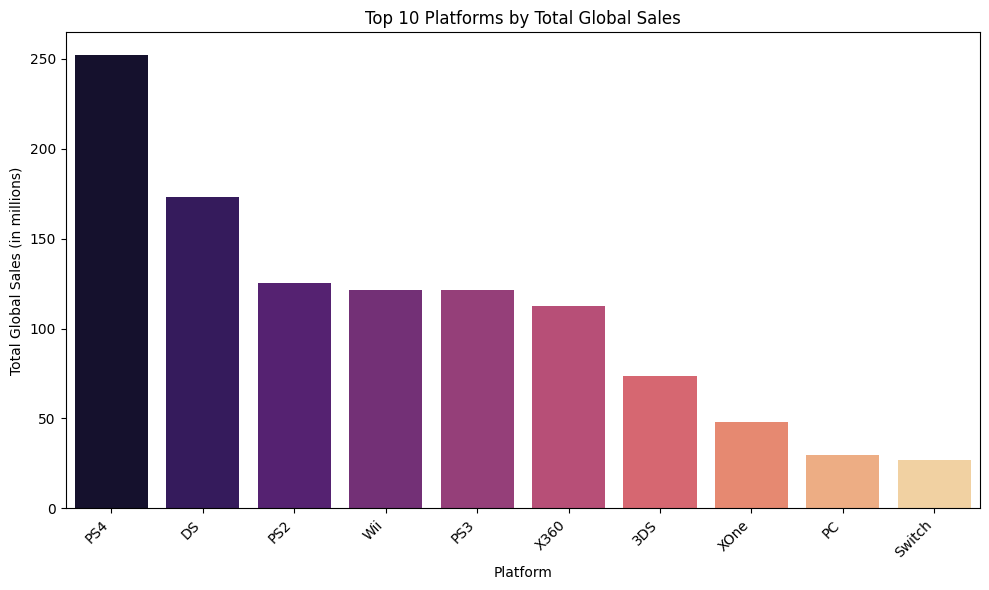


 Platform with the highest average global sales per game: PS4 (3.07 million units per game)


In [9]:
# count how many games were released each platfrom
platform_counts = games_df['Platform'].value_counts().head(10)
print("\n Top 10 platforms by number of games released:")
print(platform_counts)

# calculate total sales by platform sorted by sales
platform_sales = (
    games_df.groupby('Platform', as_index=False)['Global_Sales']
    .sum()
    .sort_values('Global_Sales', ascending=False)
)
print("\n Total global sales by platform:")
print(platform_sales)

# average sales per game for each platform
platform_avg_sales = (
    games_df.groupby('Platform', as_index=False)['Global_Sales']
    .mean()
    .sort_values('Global_Sales', ascending=False)
)
print("\n Average global sales per game by platform:")
print(platform_avg_sales)

# top-10 platforms by total sales display
top_10_platforms = platform_sales.head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=top_10_platforms, x='Platform', y='Global_Sales', palette='magma')
plt.title('Top 10 Platforms by Total Global Sales')
plt.xlabel('Platform')
plt.ylabel('Total Global Sales (in millions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# platform with highest average sales per game
top_avg_platform = platform_avg_sales.iloc[0]
print(f"\n Platform with the highest average global sales per game: {top_avg_platform['Platform']} "
      f"({top_avg_platform['Global_Sales']:.2f} million units per game)")

### Questions to Answer

- Which platform has the most games?

The platform with the most games is PS3 with 87 games

- Which platform has the highest total sales?

The platform with highest total sales is PS4

- Which platform has the highest average sales per game?

PS4 with 3.07 million unit per game

### Genre Analysis

In [10]:
# Calculate total sales by genre (sorted descending)
genre_sales = (
    games_df.groupby('Genre', as_index=False)['Global_Sales']
    .sum()
    .sort_values('Global_Sales', ascending=False)
)
print("\n Total global sales by genre:")
print(genre_sales)

# number of games per genre

genre_count = games_df["Genre"].value_counts()
print("\n Number of games per genre:")
print(genre_count)

# average sales per game for each genre
genre_avg_sales = (
    games_df.groupby('Genre', as_index=False)['Global_Sales']
    .mean()
    .sort_values('Global_Sales', ascending=False)
)

# display above 3 metrics in a summary table

genre_summary = genre_sales.merge(genre_count.rename('Game_Count'), left_on='Genre', right_index=True)
genre_summary = genre_summary.merge(genre_avg_sales.rename(columns={'Global_Sales': 'Avg_Sales'}), on='Genre')
print("\n Genre Sales Summary:")
print(genre_summary)


 Total global sales by genre:
           Genre  Global_Sales
10        Sports        282.53
0         Action        220.48
8        Shooter        151.97
9     Simulation         90.77
4       Platform         88.42
7   Role-Playing         85.50
6         Racing         80.37
2       Fighting         64.30
1      Adventure         39.45
11      Strategy         22.57
5         Puzzle         18.29
3           Misc          9.87

 Number of games per genre:
Genre
Action          140
Sports          116
Shooter          90
Role-Playing     74
Racing           59
Adventure        58
Platform         57
Fighting         47
Puzzle           32
Strategy         31
Simulation       20
Misc             14
Name: count, dtype: int64

 Genre Sales Summary:
           Genre  Global_Sales  Game_Count  Avg_Sales
0         Sports        282.53         116   2.435603
1         Action        220.48         140   1.574857
2        Shooter        151.97          90   1.688556
3     Simulation         9

### Questions to answer:

- What is the most popular genre by total sales?

The most popular genre by total sales is Sports

- Which genre has the highest average sales per game?

Genre with the highest average sales per game is Sports

- Do you notice any interesting patterns?

For me the interesting pattern is there is a huge gap between top-2 genres with other genres thus top-2 genres (sports, action) dominates the market with almost half of the market sales is sports and action genre. 


### Temporal Analysis

In [11]:
# find the years between dataset min and max year
min_year = games_df['Year'].min()
max_year = games_df["Year"].max()

print(f"\n Dataset covers years from {min_year} to {max_year}")

# total games released each year
games_per_year = games_df["Year"].value_counts().sort_index()
print("\n Total games released each year:")
print(games_per_year)

# calculate total salees by year

games_sales_per_year = (
    games_df.groupby('Year', as_index=False)['Global_Sales']
    .sum()
    .sort_values('Year')
)

print("\n Total global sales by year:")
print(games_sales_per_year)

# year with teh highest sales
top_sales_year = games_sales_per_year.iloc[games_sales_per_year['Global_Sales'].idxmax()]
print(f"\n Year with the highest total global sales: {top_sales_year['Year']} "
      f"({top_sales_year['Global_Sales']:.2f} million units)")


# year with the most games released
top_games_releaser_year = games_per_year.idxmax()
top_games_releaser_count = games_per_year.max()
print(f"\n Year with the most games released: {top_games_releaser_year} "
      f"({top_games_releaser_count} games)")


 Dataset covers years from 1985 to 2020

 Total games released each year:
Year
1985     8
1986     5
1987     3
1988     6
1989     4
1990     2
1991     2
1992     6
1993     4
1994     5
1995    15
1996    13
1997    11
1998    15
1999    10
2000    10
2001    13
2002     7
2003     7
2004     8
2005    33
2006    39
2007    30
2008    19
2009    29
2010    29
2011    27
2012    32
2013    23
2014    39
2015    55
2016    50
2017    45
2018    47
2019    38
2020    49
Name: count, dtype: int64

 Total global sales by year:
    Year  Global_Sales
0   1985          0.76
1   1986          0.60
2   1987          0.32
3   1988          2.94
4   1989          1.70
5   1990          1.31
6   1991          6.40
7   1992          4.23
8   1993          0.52
9   1994          1.73
10  1995          5.56
11  1996          8.14
12  1997         11.81
13  1998          5.36
14  1999         11.12
15  2000          3.23
16  2001         30.45
17  2002          5.27
18  2003          7.79
19  2004

### Questions to Answer

- What year had the highest total sales?

Highest total sales year is 2014 with 240.64

- What year had the most game releases?

Year with the most games released is 2015 with 55 games

- What trends do you observe over time?

Generally i think the trend is releasing more games every year. The peak of releasing games in 2015-2016 the total global sales was the highest as well but after the peak game releasing count stayed similar but not the total global sales


## Part-3 Advanced Analysis

### Regional Sales Analysis

In [12]:
# percantage of global sales by region
total_sales = games_df['Global_Sales'].sum()
region_sales = {
    'North America': games_df['NA_Sales'].sum(),
    'Europe': games_df['EU_Sales'].sum(),
    'Japan': games_df['JP_Sales'].sum(),
    'Other': games_df['Other_Sales'].sum()
}
region_percentages = {region: (sales / total_sales) * 100 for region, sales in region_sales.items()}
print("\n Percentage of global sales by region:")
for region, percentage in region_percentages.items():
    print(f"{region}: {percentage:.2f}%")   
    
    
# Find the top 5 games in North America (by NA_Sales)
grouped_na = games_df.groupby('Name', as_index=False)['NA_Sales'].sum()

top_na_games = grouped_na.nlargest(5, 'NA_Sales')

print("\nTop 5 games in North America by total sales:")
print(top_na_games)

# Find the top 5 games in Japan (by JP_Sales)
grouped_jp = games_df.groupby('Name', as_index=False)['JP_Sales'].sum()
top_jp_games = grouped_jp.nlargest(5, 'JP_Sales')
print("\nTop 5 games in Japan by total sales:")
print(top_jp_games)

# Compare: which games appear in both top 5 lists?
common_top_games = set(top_na_games['Name']).intersection(set(top_jp_games['Name']))
print("\n Games appearing in both top 5 lists (NA and JP):")
print(common_top_games if common_top_games else "No common games in top 5 lists.")

# Find which genre is most popular in each region (by total sales)
region_genre_sales = {
    'North America': games_df.groupby('Genre', as_index=False)['NA_Sales'].sum().sort_values('NA_Sales', ascending=False),
    'Europe': games_df.groupby('Genre', as_index=False)['EU_Sales'].sum().sort_values('EU_Sales', ascending=False),
    'Japan': games_df.groupby('Genre', as_index=False)['JP_Sales'].sum().sort_values('JP_Sales', ascending=False),
    'Other': games_df.groupby('Genre', as_index=False)['Other_Sales'].sum().sort_values('Other_Sales', ascending=False)
}
print("\n Most popular genre by region (by total sales):")
for region, df in region_genre_sales.items():
    top_genre = df.iloc[0]
    print(f"{region}: {top_genre['Genre']} ({top_genre[1]:.2f} million units)")


 Percentage of global sales by region:
North America: 52.69%
Europe: 36.80%
Japan: 10.51%
Other: 0.00%

Top 5 games in North America by total sales:
         Name  NA_Sales
0   Adventure     88.88
86     Strike     39.54
32      Force     36.24
84     Sports     35.35
82  Simulator     34.82

Top 5 games in Japan by total sales:
            Name  JP_Sales
0      Adventure     17.05
84        Sports     10.78
32         Force      8.35
11    Dark Quest      7.53
5   Championship      6.94

 Games appearing in both top 5 lists (NA and JP):
{'Sports', 'Force', 'Adventure'}

 Most popular genre by region (by total sales):
North America: Sports (144.80 million units)
Europe: Sports (105.92 million units)
Japan: Sports (31.81 million units)
Other: Action (0.00 million units)


/var/folders/3b/cm4b_6dj6jx1x67c1tfdzj0c0000gp/T/ipykernel_25147/1175047641.py:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"{region}: {top_genre['Genre']} ({top_genre[1]:.2f} million units)")


### Questions to Answer

- Which region contributes the most to global sales?

The region with the most global sales is North America with 52%

- Are there significant differences in game preferences between NA and Japan?

No the genre that most popular is same for NA and Japan


### Publisher Deep Dive

In [13]:
# For top 5 publishers by sale

# total number of games released by each top publisher
top_publishers_list = top_publishers.index.tolist()

# Total number of games released by each top publisher
publisher_game_counts = (
    games_df[games_df['Publisher'].isin(top_publishers_list)]
    .groupby('Publisher')['Name']
    .count()
)

print("\nTotal number of games released by each top publisher:")
print(publisher_game_counts)

# avergage sales per game for each top publisher
publisher_avg_sales = (
    games_df[games_df['Publisher'].isin(top_publishers_list)]
    .groupby('Publisher', as_index=False)['Global_Sales']
    .mean()
    .sort_values('Global_Sales', ascending=False)
)
print("\n Average global sales per game for each top publisher:")
print(publisher_avg_sales)

# msot sucessful genre for each top publ
publisher_genre_sales = (
    games_df[games_df['Publisher'].isin(top_publishers_list)]
    .groupby(['Publisher', 'Genre'], as_index=False)['Global_Sales']
    .sum()
)
most_successful_genre = publisher_genre_sales.loc[publisher_genre_sales.groupby('Publisher')['Global_Sales'].idxmax()]
print("\n Most successful genre for each top publisher:")
print(most_successful_genre)


# best selling game for each top publkisher
publisher_top_games = (
    games_df[games_df['Publisher'].isin(top_publishers_list)]
    .groupby(['Publisher', 'Name'], as_index=False)['Global_Sales']
    .sum()
)
best_selling_games = publisher_top_games.loc[publisher_top_games.groupby('Publisher')['Global_Sales'].idxmax()]
print("\n Best-selling game for each top publisher:")
print(best_selling_games)


# summary table for each metric above
publisher_summary = top_publishers.rename('Total_Sales').to_frame()
publisher_summary = publisher_summary.merge(publisher_game_counts.rename('Game_Count'), left_index=True, right_index=True)
publisher_summary = publisher_summary.merge(publisher_avg_sales.set_index('Publisher').rename(columns={'Global_Sales': 'Avg_Sales'}), left_index=True, right_index=True)    
publisher_summary = publisher_summary.merge(most_successful_genre.set_index('Publisher').rename(columns={'Genre': 'Top_Genre', 'Global_Sales': 'Top_Genre_Sales'}), left_index=True, right_index=True)
publisher_summary = publisher_summary.merge(best_selling_games.set_index('Publisher').rename(columns={'Name': 'Top_Game', 'Global_Sales': 'Top_Game_Sales'}), left_index=True, right_index=True)
print("\n Publisher Summary:")
print(publisher_summary)


Total number of games released by each top publisher:
Publisher
Electronic Arts         78
Nintendo                94
Sony                    71
Take-Two Interactive    40
Ubisoft                 51
Name: Name, dtype: int64

 Average global sales per game for each top publisher:
              Publisher  Global_Sales
4               Ubisoft      3.120588
0       Electronic Arts      2.144744
2                  Sony      2.029014
3  Take-Two Interactive      1.955500
1              Nintendo      1.192340

 Most successful genre for each top publisher:
               Publisher       Genre  Global_Sales
10       Electronic Arts      Sports         85.36
12              Nintendo      Action         39.66
33                  Sony      Sports         87.91
42  Take-Two Interactive     Shooter         26.67
55               Ubisoft  Simulation         83.29

 Best-selling game for each top publisher:
                Publisher           Name  Global_Sales
0         Electronic Arts      Adventu

### Merging Datasets and Rating Analysis

In [14]:
key = ['Name', 'Platform']

# Unique games by (Name, Platform)
games_unique = games_df.drop_duplicates(subset=key)

# One rating row per (Name, Platform), and only where Rating exists
ratings_unique = (
    ratings_df
    .dropna(subset=['Rating'])
    .drop_duplicates(subset=key)[key + ['Rating']]
)

# Left-merge: keep all games, attach Rating if present
merged = games_unique.merge(ratings_unique, on=key, how='left')
print("Shape of the merged dataset is: ", merged.shape)
print(merged.head())

# Count games that actually have a rating
num_games_with_ratings = merged['Rating'].notna().sum()
percentage_with_ratings = (num_games_with_ratings / len(games_unique)) * 100

print(f"\nNumber of games with rating information: {num_games_with_ratings}")
print(f"Percentage of games with rating information: {percentage_with_ratings:.2f}%")

# correlation between Critic_Score and Global_Sales
merged_with_scores = merged.merge(ratings_df[key + ['Critic_Score', 'User_Score']], on=key, how='left') 
correlation_critic = merged_with_scores[['Critic_Score', 'Global_Sales']].corr().iloc[0,1]
print(f"\nCorrelation between Critic_Score and Global_Sales: {correlation_critic:.4f}") 

# correlation between User_Score and Global_Sales
correlation_user = merged_with_scores[['User_Score', 'Global_Sales']].corr().iloc[0,1]
print(f"Correlation between User_Score and Global_Sales: {correlation_user:.4f}")

# games with high critic scores (>90) but low sales (<1M)
high_critic_low_sales = merged_with_scores[
    (merged_with_scores['Critic_Score'] > 90) & (merged_with_scores['Global_Sales'] < 1)
][['Name', 'Platform', 'Critic_Score', 'Global_Sales']]
print("\nGames with high Critic_Score (>90) but low Global_Sales (<1M):")
print(high_critic_low_sales)

# games with low critic scores (<50) but high sales (>5M)
low_crtic_high_sales = merged_with_scores[
    (merged_with_scores['Critic_Score'] < 50) & (merged_with_scores['Global_Sales'] > 5)
][['Name', 'Platform', 'Critic_Score', 'Global_Sales']]
print("\nGames with low Critic_Score (<50) but high Global_Sales (>5M):")
print(low_crtic_high_sales)



Shape of the merged dataset is:  (378, 11)
           Name Platform  Year      Genre             Publisher  NA_Sales  \
0  Championship       DS  2017     Action                Capcom      0.04   
1         Quest     XOne  2013  Adventure             Microsoft      0.18   
2      Warriors       DS  2015     Racing            Activision      1.08   
3    Dark Quest      PS4  1985   Fighting             505 Games      0.14   
4     Adventure       PC  2005  Adventure  Take-Two Interactive      0.02   

   EU_Sales  JP_Sales  Other_Sales  Global_Sales Rating  
0      0.03      0.01          0.0          0.08   E10+  
1      0.10      0.03         -0.0          0.31      T  
2      0.73      0.49         -0.0          2.30      E  
3      0.09      0.02          0.0          0.25      T  
4      0.02      0.00         -0.0          0.04    NaN  

Number of games with rating information: 265
Percentage of games with rating information: 70.11%

Correlation between Critic_Score and Global_Sal

### Questions to Answer

- Do critic scores correlate with sales? How strongly?

It is not much, maybe moderate correlation since the correlation between critic scores and sales is 0.32

- Do user scores correlate with sales?

Not much because the correlation between user scores and sales is 0.25. It is weaker than critic score

- Can you find any "hidden gems" or "overhyped games"?

Hidden gems could be the Simulator, Force Super Battle becasue the critic scores is 100 and the sales is below 1 million. Overhyped games could be sports and warriors since they sold a lot but the critic scores are below 50


###  Create New Features 

In [15]:
#NOTE: USING THE ORIGINAL DATASET NOT MERGED ONES (GAMES_DF, RATINGS_DF)

# create decade column
games_df['Decade'] = (games_df['Year'] // 10) * 10
games_df['Decade'] = games_df['Decade'].astype('Int64').astype(str) + 's'

# Create Sales  Category column
def classify_sales(sales):
    if sales > 5:
        return 'Blockbuster'
    elif sales > 1:
        return 'Hit'
    else:
        return 'Modest'

games_df['Sales_Category'] = games_df['Global_Sales'].apply(classify_sales)

# the percentage of games in each sales category
category_counts = games_df['Sales_Category'].value_counts()
category_percent = (category_counts / len(games_df)) * 100

print("Percentage of games in each Sales Category:")
print(category_percent.round(2).astype(str) + '%')

#  which genre has the highest percentage of 'Blockbuster' games
# Calculate total games per genre
genre_total = games_df.groupby('Genre')['Name'].count()

# Calculate number of Blockbuster games per genre
genre_blockbusters = games_df[games_df['Sales_Category'] == 'Blockbuster'].groupby('Genre')['Name'].count()

# Calculate percentage of Blockbusters within each genre
genre_blockbuster_percent = (genre_blockbusters / genre_total * 100).fillna(0)

#  the top genre
top_blockbuster_genre = genre_blockbuster_percent.idxmax()
top_blockbuster_percent = genre_blockbuster_percent.max()

print(f"\nGenre with the highest percentage of Blockbuster games: {top_blockbuster_genre} ({top_blockbuster_percent:.2f}%)")

# display full table
print("\nPercentage of Blockbuster games by genre:")
print(genre_blockbuster_percent.round(2).astype(str) + '%')



Percentage of games in each Sales Category:
Sales_Category
Modest          72.9%
Hit            20.33%
Blockbuster     6.78%
Name: count, dtype: object

Genre with the highest percentage of Blockbuster games: Shooter (10.00%)

Percentage of Blockbuster games by genre:
Genre
Action          8.57%
Adventure        0.0%
Fighting        8.51%
Misc             0.0%
Platform        3.51%
Puzzle          3.12%
Racing          5.08%
Role-Playing    6.76%
Shooter         10.0%
Simulation       5.0%
Sports          9.48%
Strategy        6.45%
Name: Name, dtype: object


## Part-4 Insights and Open Exploration 

In [16]:
platform_sales = games_df.groupby('Platform', as_index=False)['Global_Sales'].sum().sort_values('Global_Sales', ascending=False)
print(platform_sales.head(10))

# Compare within major generations

ps_vs_xboxone = platform_sales[platform_sales['Platform'].isin(['PS4', 'XOne'])]


print("\n (PS4/XOne):\n", ps_vs_xboxone)

# Filter Nintendo and EA rows from publisher_summary
nintendo = publisher_summary.loc['Nintendo']
ea = publisher_summary.loc['Electronic Arts']

print("\nNintendo Summary:\n", nintendo)
print("\nElectronic Arts Summary:\n", ea)

# Regional share comparison
region_sales = games_df.groupby(['Publisher'])[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
region_share = region_sales.div(region_sales.sum(axis=1), axis=0) * 100
print("\nRegional Sales Share (%):\n", region_share.loc[['Nintendo','Electronic Arts']])


# Number of games released per decade
decade_counts = games_df['Decade'].value_counts().sort_index()
print("\nGames released per decade:\n", decade_counts)

# Total sales per decade
sales_by_decade = games_df.groupby('Decade')['Global_Sales'].sum()
print("\nTotal sales per decade (millions):\n", sales_by_decade.round(2))

# Top genre per decade
top_genre_decade = (
    games_df.groupby(['Decade', 'Genre'])['Global_Sales']
    .sum()
    .reset_index()
    .sort_values(['Decade', 'Global_Sales'], ascending=[True, False])
    .groupby('Decade')
    .head(1)
)
print("\nTop genre by decade:\n", top_genre_decade)

# Platform diversity: number of unique platforms per decade
platform_diversity = games_df.groupby('Decade')['Platform'].nunique()
print("\nUnique platforms per decade:\n", platform_diversity)



   Platform  Global_Sales
9       PS4        252.07
1        DS        172.96
7       PS2        125.10
13      Wii        121.65
8       PS3        121.44
15     X360        112.57
0       3DS         73.83
16     XOne         47.83
5        PC         29.48
12   Switch         27.14

 (PS4/XOne):
    Platform  Global_Sales
9       PS4        252.07
16     XOne         47.83

Nintendo Summary:
 Total_Sales               112.08
Game_Count                    94
Avg_Sales                1.19234
Top_Genre                 Action
Top_Genre_Sales            39.66
Top_Game           Shadow Racing
Top_Game_Sales             17.19
Name: Nintendo, dtype: object

Electronic Arts Summary:
 Total_Sales           167.29
Game_Count                78
Avg_Sales           2.144744
Top_Genre             Sports
Top_Genre_Sales        85.36
Top_Game           Adventure
Top_Game_Sales         53.52
Name: Electronic Arts, dtype: object

Regional Sales Share (%):
                   NA_Sales   EU_Sales   JP_Sa

###  Answer Analytical Questions

- Platform Wars: Which gaming platform generation "won" (had highest sales)? Consider PS2 vs Xbox vs GameCube, or PS3 vs Xbox360 vs Wii, or PS4 vs XboxOne.

I considered PS4 vs XboxOne and the results above suggests that PS4 is clearly won the platform wars with 200 million units more

- Publisher Strategy: Compare Nintendo and EA. How do their strategies differ in terms of: Number of games released, Average sales per game, Genre focus, Regional sales distribution

Nintendo is more focused on releasing more games a year while EA is more focused on the average sale and their average sale is more than nintendo with 20 games less. As well as EA's top game has been sold a lot more than Nintendo's top game; it could mean that EA is more focused on the games quality then quantity while Nintendo is more focused on releasing more games. Also Nintendo tends to relase more games on Action while EA is more focused on Sports game which might be the reason EA's sales are more than Nintendo's because Sports is also the most selling game genre. One last thing is that also Nintendo is only sold more in Japan; it could be an affect or regional company and Nintendo is more popular in Japan as well. But in NA and Europe EA is has little bit more sales thatn Nintendo

- Industry Evolution: How has the gaming industry changed from the 1980s to 2010s? Consider: Number of games released, Total sales trends, Popular genres over time, Platform diversity

From 1980's to 2010's the number of games released has been increased so much and the result of that the sales has been gone up very much with it. We are in the middle of 2020 but it seems that the trend will break in teh 2020's because the number of games released has been not a much as 2010's and if it goes like this it might not even catch up to 2000's in terms of sales, releasing games. From 1980's to 1990's the most popular genre was action but with 2000 the most popular genre become sports and again in 2020's the trend has been changed in genre as well thus in 2020's it seems that the most popular genre is action for now. For the platform diversity same trend follows with sales and number of games released as well from 1980's to 2010's unique platforms has been increased but in 2020's again the diversity has been lowered a little bit. To sum up for all the variables (Number of games released, Total sales trends, Popular genres over time, Platform diversity) the trend is very similar. 

### Find Something Interesting

In [28]:
# Which games were successful in one region but flopped in others?

# Define success and flop thresholds
success_threshold = 1.0  
flop_threshold = 0.1     

# Identify games that were successful in one region but flopped in others
def region_success_flop(row):
    # Only consider NA, EU, and JP regions
    regions = ['NA_Sales', 'EU_Sales', 'JP_Sales']
    success_regions = [region for region in regions if row[region] >= success_threshold]
    flop_regions = [region for region in regions if row[region] <= flop_threshold]
    
    # A game must succeed in exactly one region and flop in at least one other
    if len(success_regions) == 1 and len(flop_regions) >= 1:
        return success_regions[0], flop_regions
    return None

# Apply the function
games_df['Success_Flop'] = games_df.apply(region_success_flop, axis=1)

# Filter and show results
successful_flop_games = games_df[games_df['Success_Flop'].notna()][
    ['Name', 'Platform', 'Genre', 'Publisher', 'Success_Flop', 'NA_Sales', 'EU_Sales', 'JP_Sales']
]

print("\nGames successful in one region but flopped in others:\n", successful_flop_games)



Games successful in one region but flopped in others:
                       Name Platform         Genre        Publisher  \
7               Tournament      PS3       Shooter  Electronic Arts   
264        Dark Tournament      PS4        Sports             Sega   
420           Championship      Wii        Action           Konami   
466             Pro Strike      Wii       Shooter          Ubisoft   
695  Ultimate Championship      PS4  Role-Playing     Namco Bandai   

               Success_Flop  NA_Sales  EU_Sales  JP_Sales  
7    (NA_Sales, [JP_Sales])      1.12      0.89      0.09  
264  (NA_Sales, [JP_Sales])      1.00      0.91      0.10  
420  (NA_Sales, [JP_Sales])      1.08      0.74      0.07  
466  (NA_Sales, [JP_Sales])      1.14      0.87      0.07  
695  (NA_Sales, [JP_Sales])      1.24      0.93      0.07  


### Games Were Successful in One Region but Flopped in Others?

- I defined the successful threshold for a game if that game has been sold more than 1 million untis. Then if the game is flopped that means for me is sold less then 100k as stated in above threshold. The games that is sucessful in one region are Tournament, Dark tournament, Championship, Pro strike, Ultimate Championship which are all successful in the North America based on sales and they all flopped in Japan sales so there is a interesting pattern here it could be because of culture preference etc.. The other interesting pattern is that the games that flopped in Japan are all similar type of genre with being shooter, Action and we can tell this pattern is not because of publisher so there is no bias for pıblisher in the Japan because all of the publishers are different in this result. 